In [0]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from JenaClimate import JenaClimate
from plot_util import plot_history

Using TensorFlow backend.


In [0]:
jena_climate = JenaClimate()
train_gen, val_gen, test_gen = jena_climate.build_generator()

In [0]:
model = Sequential()
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, 14)))
model.add(GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mae')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history = model.fit_generator(
    train_gen, steps_per_epoch=500, epochs=20, 
    validation_data=val_gen, validation_steps=jena_climate.val_steps
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
500/500 [==============================] - 359s 718ms/step - loss: 0.3356 - val_loss: 0.2784
Epoch 2/20
500/500 [==============================] - 356s 711ms/step - loss: 0.3159 - val_loss: 0.2724
Epoch 3/20
500/500 [==============================] - 354s 707ms/step - loss: 0.3065 - val_loss: 0.2692
Epoch 4/20
500/500 [==============================] - 354s 709ms/step - loss: 0.2998 - val_loss: 0.2724
Epoch 5/20
500/500 [==============================] - 352s 704ms/step - loss: 0.2977 - val_loss: 0.2651
Epoch 6/20
500/500 [==============================] - 356s 711ms/step - loss: 0.2971 - val_loss: 0.2673
Epoch 7/20
500/500 [==============================] - 354s 708ms/step - loss: 0.2913 - val_loss: 0.2702
Epoch 8/20
500/500 [==============================] - 352s 705ms/step - loss: 0.2889 - val_loss: 0.2677
Epoch 9/20
500/500 [==============================] - 352s 704ms/step - loss: 0.2871 - val_loss: 0.2670
Epoch 10/20
500/

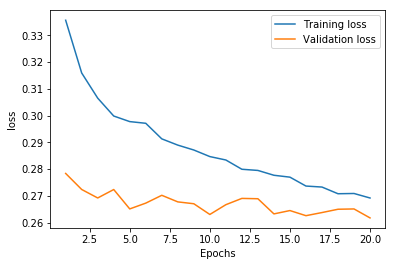

In [0]:
plot_history(history, metrics=['loss'])